In [1]:
import numpy as np # для матричных вычислений
import pandas as pd # для анализа и предобработки данных
import matplotlib.pyplot as plt # для визуализации
import seaborn as sns # для визуализации

%matplotlib inline
plt.style.use('seaborn')

from sklearn.cluster import DBSCAN # импортируем sklearn для кластеризации

### Задание 7.4

Для датасета с ценами квартир проведите кластеризацию DBSCAN с параметрами по умолчанию. 

Визуализируйте результаты. 

Сколько точек было размечено как выбросы?

In [2]:
data = pd.read_csv('data/housing.zip')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1355 entries, 0 to 1354
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    1355 non-null   float64
 1   price   1355 non-null   float64
dtypes: float64(2)
memory usage: 21.3 KB


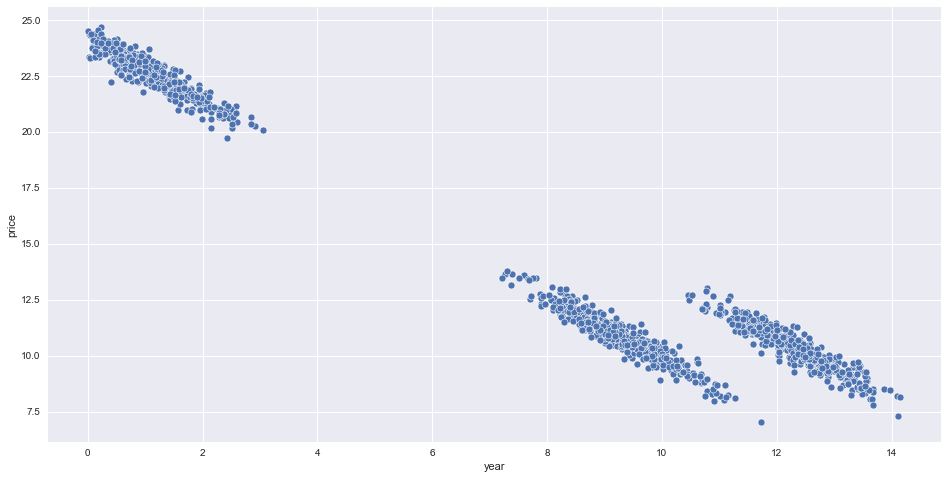

In [4]:
# Визуализирую данные
fig, ax = plt.subplots(figsize=(16, 8))
sns.scatterplot(data = data, x='year', y='price', ax=ax)
plt.show()

Визуально, очевидно наличие 3х кластеров

In [5]:
X = data.copy()

Использую DBSCAN кластеризацию

In [6]:
# запускаем кластеризацию на наших данных
dbscan_clustering = DBSCAN()

dbscan_clustering.fit(X)

data['dbscan_clustering'] = dbscan_clustering.labels_

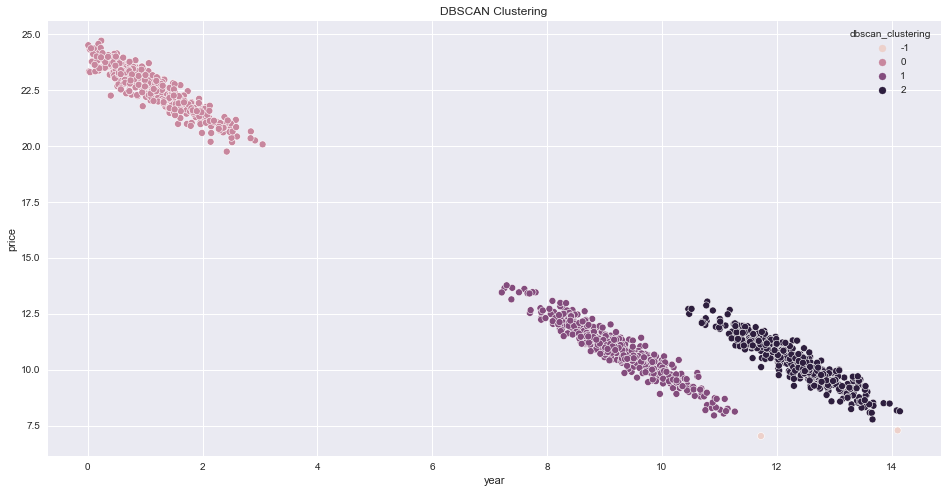

In [7]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.scatterplot(data = data, x='year', y='price', hue='dbscan_clustering', ax=ax)
ax.set_title('DBSCAN Clustering')
plt.show()

In [8]:
(data['dbscan_clustering'] == -1).sum()

2

Две точки попали в выбросы

In [9]:
# Смена параметров по умолчанию позволяет регулировать что считать выносами
dbscan_clustering = DBSCAN(eps=0.7, min_samples=6)

dbscan_clustering.fit(X)

data['dbscan_clustering_tune'] = dbscan_clustering.labels_

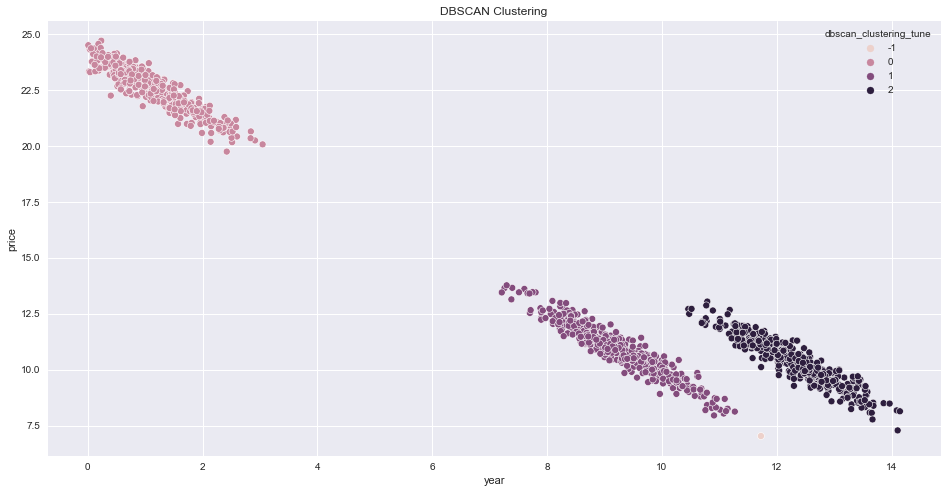

In [10]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.scatterplot(data = data, x='year', y='price', hue='dbscan_clustering_tune', ax=ax)
ax.set_title('DBSCAN Clustering')
plt.show()

In [11]:
(data['dbscan_clustering_tune'] == -1).sum()

1